In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Univariate

In [6]:
num=['age', 'bmi', 'children', 'charges']
cat=['sex', 'smoker', 'region']

Column:- age
Mean:- 39.20702541106129
Median:- 39.0
Std:- 14.049960379216172
min:- 18
max:- 64


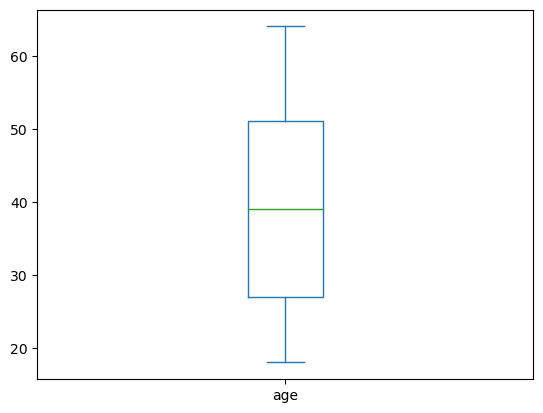

AxesSubplot(0.125,0.11;0.775x0.77) None


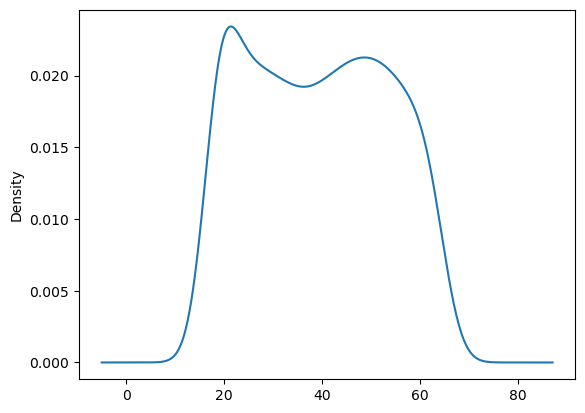

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- bmi
Mean:- 30.663396860986538
Median:- 30.4
Std:- 6.098186911679017
min:- 15.96
max:- 53.13


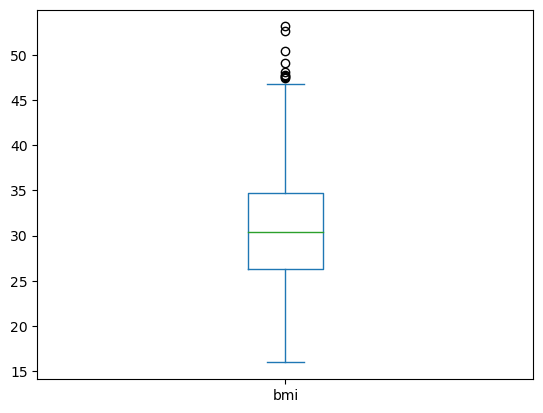

AxesSubplot(0.125,0.11;0.775x0.77) None


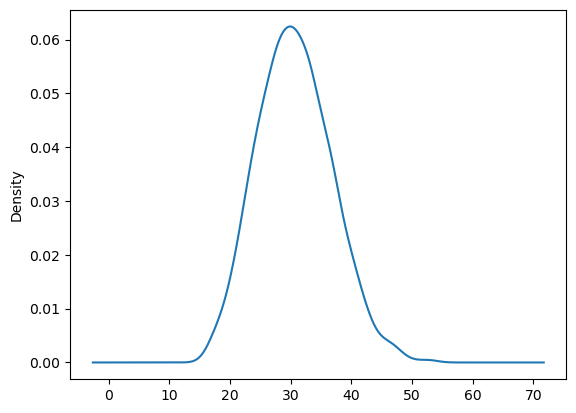

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- children
Mean:- 1.0949177877429
Median:- 1.0
Std:- 1.2054927397819095
min:- 0
max:- 5


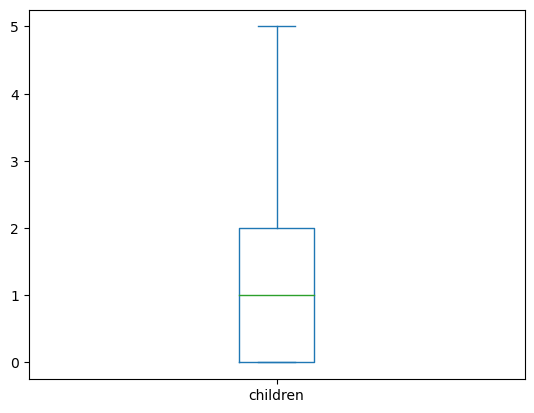

AxesSubplot(0.125,0.11;0.775x0.77) None


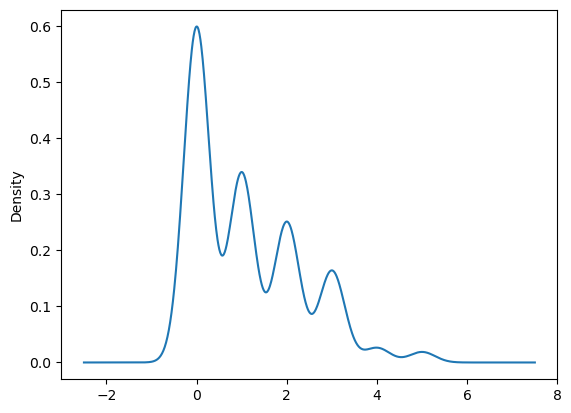

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************
Column:- charges
Mean:- 13270.422265141257
Median:- 9382.033
Std:- 12110.011236693994
min:- 1121.8739
max:- 63770.42801


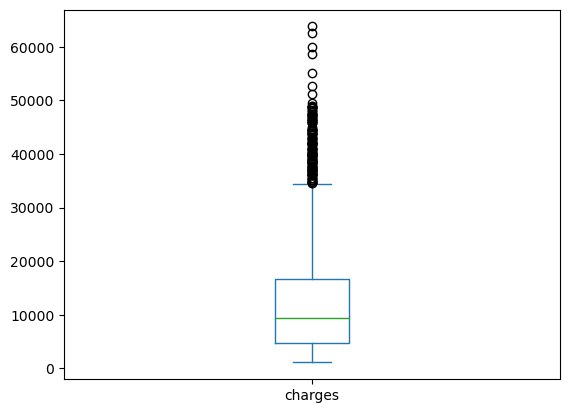

AxesSubplot(0.125,0.11;0.775x0.77) None


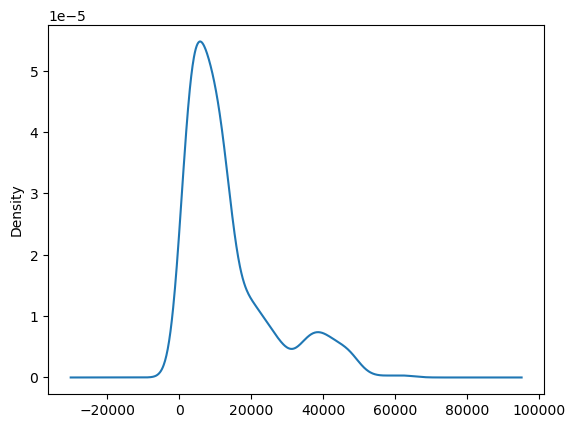

AxesSubplot(0.125,0.11;0.775x0.77) None

*************************************************************


In [7]:
for i in num:
    print("Column:-",i)
    print('Mean:-',df[i].mean())
    print('Median:-',df[i].median())
    print("Std:-",df[i].std())
    print("min:-",df[i].min())
    print("max:-",df[i].max())
    print(df[i].plot(kind="box"),plt.show())
    print(df[i].plot(kind="kde"),plt.show())
    print()
    print("*************************************************************")

#### Outliers Detection

In [8]:
q1=df['bmi'].quantile(0.25)
q3=df['bmi'].quantile(0.75)

IQR=q3-q1

lower= q1-1.5*IQR
upper= q3+1.5*IQR

print("Q1 =",q1)
print("Q3 =",q3)
print("IQR =",IQR)
print("lower =",lower)
print("Upper =",upper)

Q1 = 26.29625
Q3 = 34.69375
IQR = 8.3975
lower = 13.7
Upper = 47.290000000000006


In [9]:
df=df[(df['bmi']>lower)&(df['bmi']<upper)]

<AxesSubplot:>

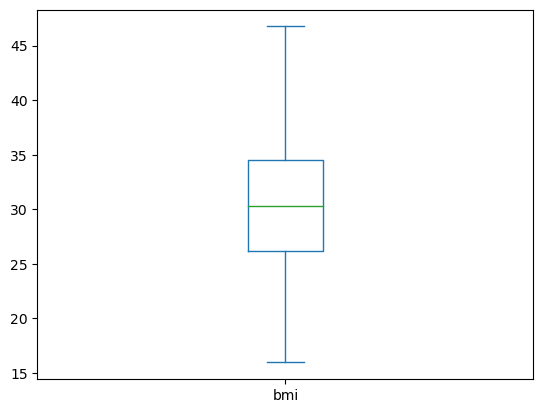

In [10]:
df["bmi"].plot(kind="box")

Feature = sex

mode: 0    male
Name: sex, dtype: object
Value_counts:
 male      670
female    659
Name: sex, dtype: int64


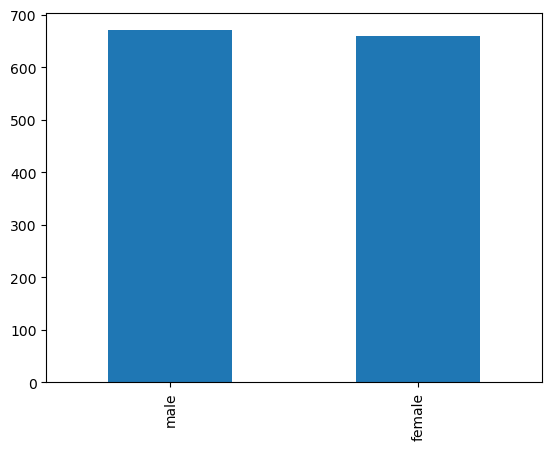

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = smoker

mode: 0    no
Name: smoker, dtype: object
Value_counts:
 no     1058
yes     271
Name: smoker, dtype: int64


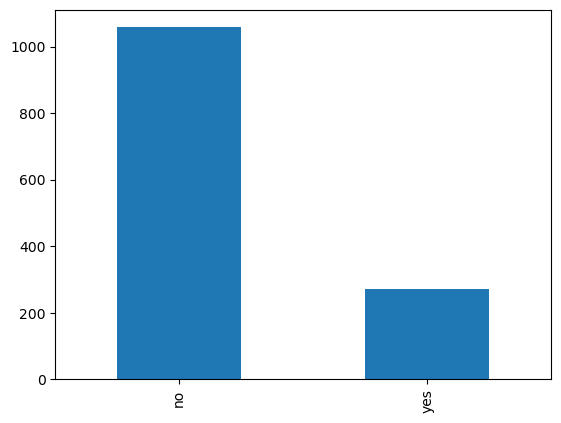

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************
Feature = region

mode: 0    southeast
Name: region, dtype: object
Value_counts:
 southeast    357
northwest    325
southwest    324
northeast    323
Name: region, dtype: int64


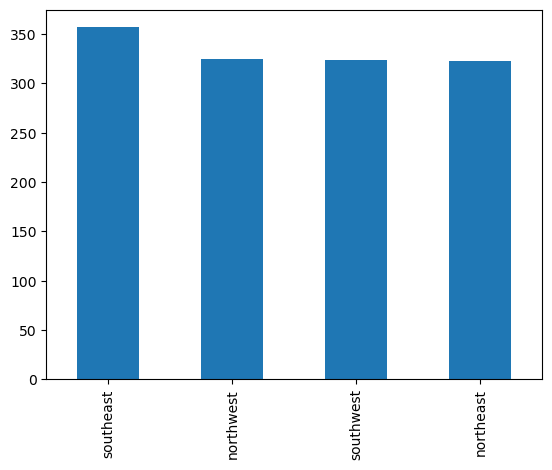

AxesSubplot(0.125,0.11;0.775x0.77) None
******************************************************************


In [11]:
for column in cat:
    print("Feature =",column)
    print()
    print("mode:",df[column].mode())
    print("Value_counts:\n",df[column].value_counts())
    print(df[column].value_counts().plot(kind = 'bar'),plt.show())
    print("******************************************************************")

SPRINT 2 - Data Preparation and Model Building

Problem Statement - The aim here will be to predict the medical costs billed by health insurance on an individual given some features about the individual in the dataset.

Steps to be followed
Step - 1: Load the data and perform the basic EDA to understand the data.
Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy
Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).
Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 5: Data preparation on test data:
-   For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression / Linear Regression
- Support Vector Machines
- Decision Trees
- Random Forest
Step - 7: Predict and evaluate each model separately using the correct evaluation metric. 
Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved. Write your conclusion on the best algorithm for the Medical Cost Prediction problem.



In [12]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
#Identifying the output/target variable
y=df['charges']
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

In [15]:
# Target variable is numerical we can conclude that it is an "Regression Task"
# Evaluation metric task = Mean Absolute Error

In [16]:
# Spliting into Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=100)

In [17]:
X_train.head()

,age,sex,bmi,children,smoker,region
1253,40,female,29.300,4,no,southwest
595,46,female,33.725,1,no,northeast
578,52,male,30.200,1,no,southwest
836,36,male,31.500,0,no,southwest
679,49,female,23.180,2,no,northwest


In [18]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(996, 6) (996,)
(333, 6) (333,)


##### Seperating Categorical and numerical columns

In [19]:
X_train.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object

In [20]:
#Categorical
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat.head()

,sex,smoker,region
1253,female,no,southwest
595,female,no,northeast
578,male,no,southwest
836,male,no,southwest
679,female,no,northwest


In [21]:
#Numerical
X_train_num = X_train.select_dtypes(include=["int64","float64"])
X_train_num.head()

,age,bmi,children
1253,40,29.300,4
595,46,33.725,1
578,52,30.200,1
836,36,31.500,0
679,49,23.180,2


In [22]:
# Scaling on numerical columns
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# To numpy array
X_train_num_rescaled=pd.DataFrame(scaler.fit_transform(X_train_num),
                                 columns=X_train_num.columns,
                                 index=X_train_num.index)
X_train_num_rescaled.head()

,age,bmi,children
1253,0.062525,-0.211657,2.384342
595,0.494491,0.538212,-0.095440
578,0.926457,-0.059142,-0.095440
836,-0.225452,0.161159,-0.922034
679,0.710474,-1.248764,0.731154


In [23]:
X_train_num.describe()

,age,bmi,children
count,996.000000,996.000000,996.000000
mean,39.131526,30.548996,1.115462
std,13.896956,5.903995,1.210391
min,18.000000,15.960000,0.000000
25%,26.000000,26.315000,0.000000
50%,40.000000,30.210000,1.000000
75%,51.000000,34.520000,2.000000
max,64.000000,46.750000,5.000000


In [24]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 3
Mean of each column: [39.1315261  30.54899598  1.11546185]
Std of each column: [13.88997826  5.90103082  1.20978353]


### OneHotEncoding on categorical columns

In [25]:
for i in cat:
    print("Feature:- ",i)
    print(X_train_cat[i].value_counts(normalize=True))
    print("****************************************************")

Feature:-  sex
female    0.50502
male      0.49498
Name: sex, dtype: float64
****************************************************
Feature:-  smoker
no     0.795181
yes    0.204819
Name: smoker, dtype: float64
****************************************************
Feature:-  region
southeast    0.267068
southwest    0.251004
northwest    0.245984
northeast    0.235944
Name: region, dtype: float64
****************************************************


In [26]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop='first',sparse=False)
#To numpy array
X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)
X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1253,0.0,0.0,0.0,0.0,1.0
595,0.0,0.0,0.0,0.0,0.0
578,1.0,0.0,0.0,0.0,1.0
836,1.0,0.0,0.0,0.0,1.0
679,0.0,0.0,1.0,0.0,0.0


###### Concating Encoded catogorical features and rescaled numerical features

In [27]:
X_train_transformed=pd.concat([X_train_num_rescaled,X_train_cat_ohe],axis=1)

X_train_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1253,0.062525,-0.211657,2.384342,0.0,0.0,0.0,0.0,1.0
595,0.494491,0.538212,-0.095440,0.0,0.0,0.0,0.0,0.0
578,0.926457,-0.059142,-0.095440,1.0,0.0,0.0,0.0,1.0
836,-0.225452,0.161159,-0.922034,1.0,0.0,0.0,0.0,1.0
679,0.710474,-1.248764,0.731154,0.0,0.0,1.0,0.0,0.0


### Preparing Test Data

In [28]:
#Categorical Test
X_test_cat= X_test.select_dtypes(include=['object'])
X_test_cat.head()

,sex,smoker,region
1104,male,no,southwest
453,male,no,northwest
1291,male,yes,southwest
1277,female,no,northwest
523,female,no,southeast


In [29]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1104,1.0,0.0,0.0,0.0,1.0
453,1.0,0.0,1.0,0.0,0.0
1291,1.0,1.0,0.0,0.0,1.0
1277,0.0,0.0,1.0,0.0,0.0
523,0.0,0.0,0.0,1.0,0.0


In [30]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,age,bmi,children
1104,37,29.800,0
453,20,29.735,0
1291,19,34.900,0
1277,32,29.735,0
523,38,37.730,0


In [31]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
1104,-0.153458,-0.126926,-0.922034
453,-1.377362,-0.137941,-0.922034
1291,-1.449356,0.737329,-0.922034
1277,-0.513430,-0.137941,-0.922034
523,-0.081463,1.216907,-0.922034


In [32]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1104,-0.153458,-0.126926,-0.922034,1.0,0.0,0.0,0.0,1.0
453,-1.377362,-0.137941,-0.922034,1.0,0.0,1.0,0.0,0.0
1291,-1.449356,0.737329,-0.922034,1.0,1.0,0.0,0.0,1.0
1277,-0.513430,-0.137941,-0.922034,0.0,0.0,1.0,0.0,0.0
523,-0.081463,1.216907,-0.922034,0.0,0.0,0.0,1.0,0.0


# Linear Regression

In [95]:
from sklearn.linear_model import LinearRegression
lireg=LinearRegression()

In [96]:
# Fiting
y_test_pred=lireg.fit(X_train_transformed,y_train)

In [97]:
#Predicting
y_test_pred=lireg.predict(X_test_transformed)

In [73]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
1104,20420.60465,5949.681900
453,1769.53165,2745.925155
1291,34828.65400,26803.401306
1277,4357.04365,5875.484692
523,5397.61670,9636.052232


<AxesSubplot:xlabel='charges', ylabel='Count'>

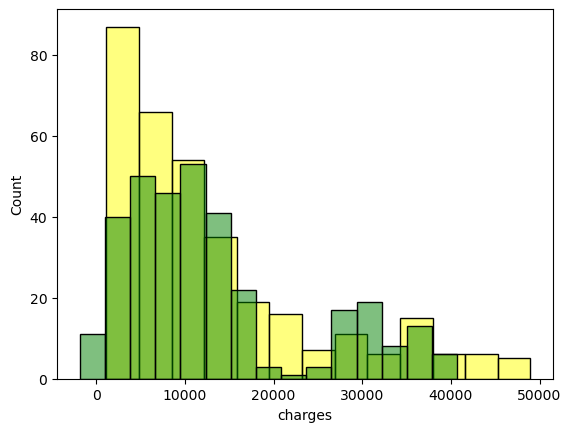

In [74]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

In [75]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('r2 Score : ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  4216.628979172493
r2 Score :  0.7283419190875067


# KNN Regression

In [102]:
from sklearn.neighbors import KNeighborsRegressor
knreg=KNeighborsRegressor()
knreg.fit(X_train_transformed,y_train)

KNeighborsRegressor()

In [103]:
y_test_pred=knreg.predict(X_test_transformed)

<AxesSubplot:xlabel='charges', ylabel='Count'>

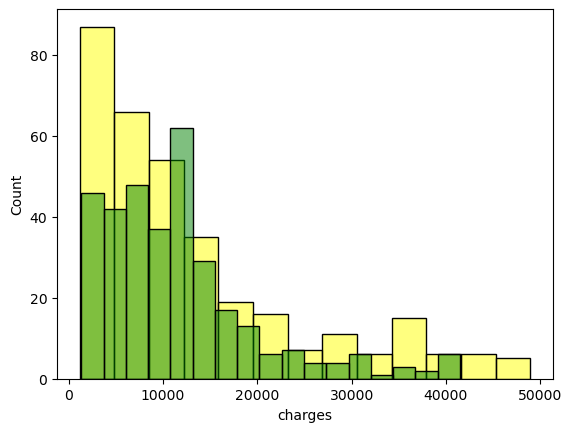

In [104]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

In [105]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('r2 Score : ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  4092.2019264846845
r2 Score :  0.6534804088255726


# Decision Tree Regression

In [98]:
from sklearn.tree import DecisionTreeRegressor
dtreg=DecisionTreeRegressor()
dtreg.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [99]:
y_test_pred=dtreg.predict(X_test_transformed)

<AxesSubplot:xlabel='charges', ylabel='Count'>

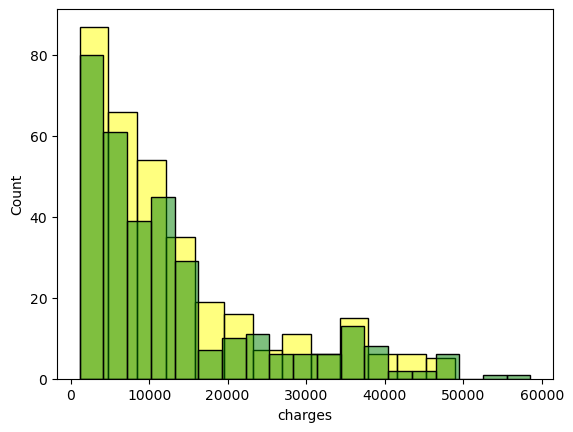

In [100]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

In [101]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('r2 Score : ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  2824.341839219219
r2 Score :  0.7079461259930351


# Random Forest 

In [84]:
from sklearn.ensemble import RandomForestRegressor
rfreg=RandomForestRegressor()

In [85]:
rfreg.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [86]:
y_test_pred = rfreg.predict(X_test_transformed)

<AxesSubplot:xlabel='charges', ylabel='Count'>

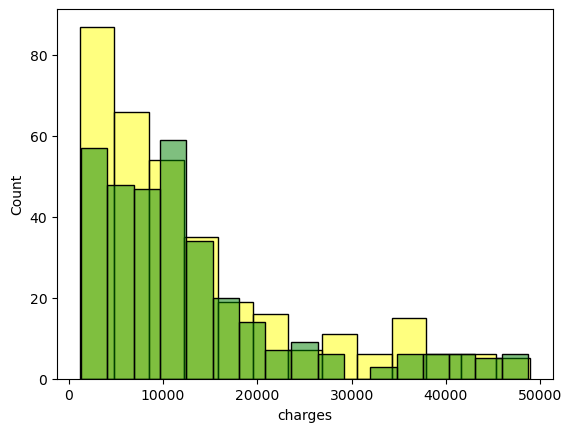

In [87]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='green', alpha=0.5)

In [88]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('r2 Score : ', metrics.r2_score(y_test, y_test_pred))

Mean Absolute Error:  2640.8191394450955
r2 Score :  0.8179496801229655


# Support Vector Machines

In [89]:
from sklearn.svm import SVR
svc=SVR()

In [53]:
svc.fit(X_train_transformed,y_train)

SVR()

In [54]:
y_test_pred = svc.predict(X_test_transformed)

<AxesSubplot:xlabel='charges', ylabel='Count'>

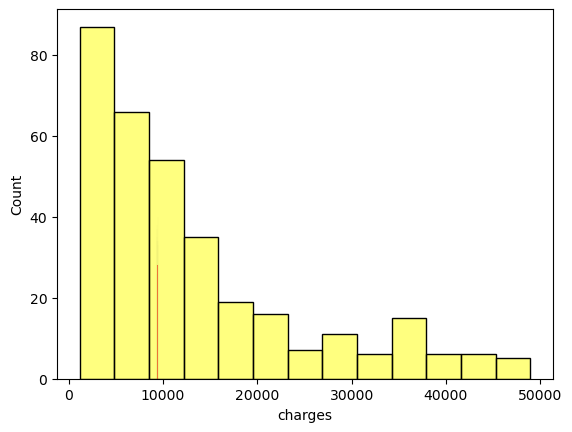

In [55]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [56]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


Mean Absolute Error:  8258.621542912939
Mean Squared Error:  144997183.47308007
Root Mean Squared Error:  12041.477628309578


# Recommendation :

## `As we observed from above algorithms "Random Forest Regression" performing well for for the Medical Cost Prediction problem .`

In [67]:
# ada boost model
from sklearn.ensemble import AdaBoostRegressor
reg = AdaBoostRegressor()
reg.fit(X_train_transformed,y_train)
# step 6 prediction
y_test_predicted_a =reg.predict(X_test_transformed)

from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_predicted_a))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_predicted_a))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_predicted_a)))

print('R_square score: ', (metrics.r2_score(y_test, y_test_predicted_a)))




Mean Absolute Error:  3897.627963525787
Mean Squared Error:  26950543.521514125
Root Mean Squared Error:  5191.391289578751
R_square score:  0.7965293666355303


<AxesSubplot:xlabel='charges', ylabel='Count'>

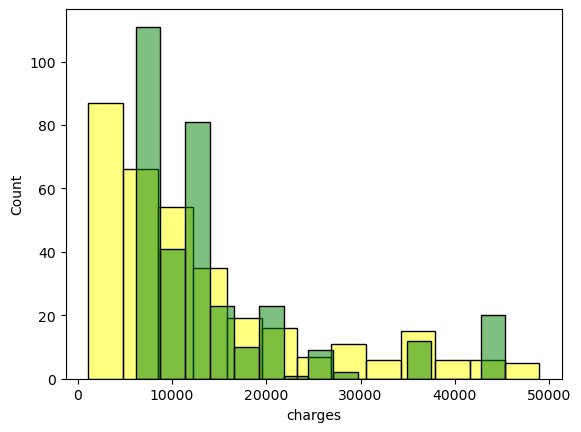

In [69]:
sns.histplot(y_test, color='yellow', alpha=0.5)
sns.histplot(y_test_predicted_a, color='green', alpha=0.5)